#Keras libraries

## Download dataset and display example images

In [1]:
from keras.datasets import mnist
from matplotlib import pyplot

11493376/11490434 [==============================] - 0s 0us/step


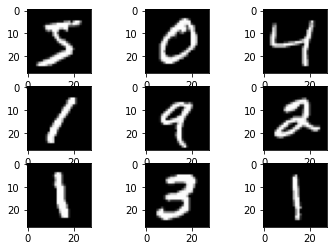

In [2]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# create a grid of 3x3 images
for i in range(0, 9):
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
  
# show the plot
pyplot.show()

## Standardize image across the dataset

In [3]:
# Standardize images across the dataset, mean=0, stdev=1
from keras.preprocessing.image import ImageDataGenerator

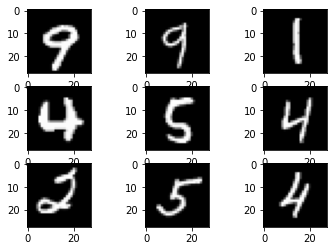

In [5]:
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# define data preparation
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)

# fit parameters from data
datagen.fit(X_train)

# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
  # create a grid of 3x3 images
  for i in range(0, 9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
  # show the plot
  pyplot.show()
  break

## ZCA whitening

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:337: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


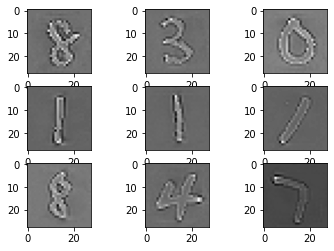

In [6]:
# ZCA whitening
# define data preparation
datagen = ImageDataGenerator(zca_whitening=True)

# fit parameters from data
datagen.fit(X_train)

# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
  # create a grid of 3x3 images
  for i in range(0, 9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
  # show the plot
  pyplot.show()
  break

## Random rotations

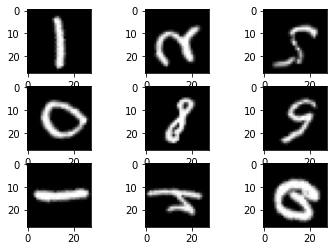

In [7]:
# define data preparation
datagen = ImageDataGenerator(rotation_range=270)

# fit parameters from data
datagen.fit(X_train)

# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
  # create a grid of 3x3 images
  for i in range(0, 9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
  # show the plot
  pyplot.show()
  break

## Ramdom Flips

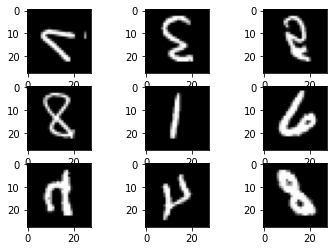

In [8]:
# define data preparation
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)

# fit parameters from data
datagen.fit(X_train)

# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
  # create a grid of 3x3 images
  for i in range(0, 9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
  # show the plot
  pyplot.show()
  break

## Save augmented images to files

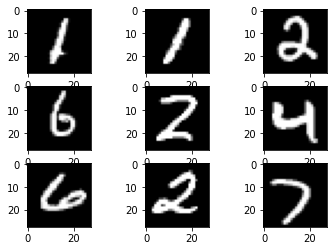

In [13]:
import os

# Save augmented images to file
# define data preparation
datagen = ImageDataGenerator()

# fit parameters from data
datagen.fit(X_train)

# configure batch size and retrieve one batch of images
os.makedirs('images')
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9, save_to_dir='images', save_prefix='aug', save_format='png'):
  # create a grid of 3x3 images
  for i in range(0, 9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
  # show the plot
  pyplot.show()
  break

# Image Classification with Neural Networks

## Required libraries

In [14]:
!pip install -U tensorflow_datasets

     |████████████████████████████████| 3.7MB 6.7MB/s 
  Found existing installation: tensorflow-datasets 4.0.1
    Uninstalling tensorflow-datasets-4.0.1:
      Successfully uninstalled tensorflow-datasets-4.0.1


In [15]:
import tensorflow as tf

# Import TensorFlow Datasets
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

# Helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

## Import dataset - the fasion MNIST dataset

In [16]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [17]:
class_names = metadata.features['label'].names
print("Class names: {}".format(class_names))

Class names: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


## Explore the data

In [18]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples

print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples: {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples: 10000


## Preprocess the data

In [19]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

In [20]:
# The map function applies the normalize function to each element in the train
# and test datasets
train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

In [21]:
# The first time you use the dataset, the images will be loaded from disk
# Caching will keep them in memory, making training faster
train_dataset = train_dataset.cache()
test_dataset = test_dataset.cache()

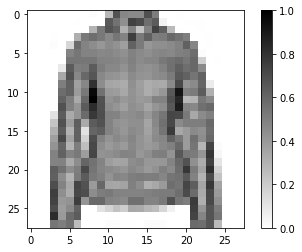

In [24]:
# Take a single image, and remove the color dimension by reshaping
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

# Plot the image - voila a piece of fashion clothing
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

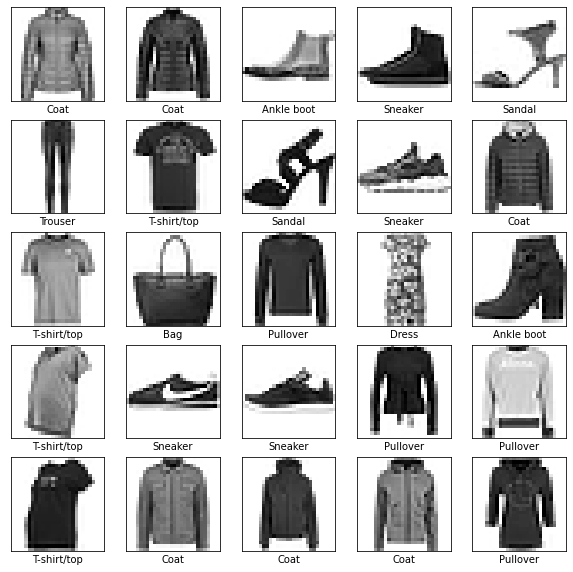

In [25]:
plt.figure(figsize=(10,10))

for i, (image, label) in enumerate(test_dataset.take(25)):
  image = image.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image, cmap=plt.cm.binary)
  plt.xlabel(class_names[label])
plt.show()

## Build the model

### Setup the layers

In [26]:
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

### Compile the model

In [27]:
model.compile(optimizer = 'adam',
                            loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                            metrics = ['accuracy'])

### Train the model

In [28]:
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [29]:
model.fit(train_dataset, epochs=5, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5
1875/1875 [==============================] - 10s 2ms/step - loss: 0.6297 - accuracy: 0.7834
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3874 - accuracy: 0.8615
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3495 - accuracy: 0.8728
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3176 - accuracy: 0.8832
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2986 - accuracy: 0.8886


### Evaluate accuracy

In [33]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset: {:.4f}'.format(test_accuracy))

313/313 [==============================] - 0s 1ms/step - loss: 0.3633 - accuracy: 0.8686
Accuracy on test dataset: 0.8686


### Make predictions and explore

In [44]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)
  
predictions.shape

(32, 10)

In [37]:
predictions[0]

array([3.5559078e-05, 3.8089445e-05, 1.3732610e-02, 6.7504180e-07,
       9.7218543e-01, 1.7581787e-08, 1.3912353e-02, 1.7121738e-09,
       9.5121104e-05, 1.5889570e-09], dtype=float32)

In [38]:
np.argmax(predictions[0])

4

In [39]:
test_labels[0]

4

In [40]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                                      100*np.max(predictions_array),
                                                      class_names[true_label]),
                                                      color=color)

In [41]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [45]:
n, _ = predictions.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


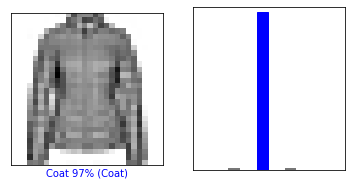

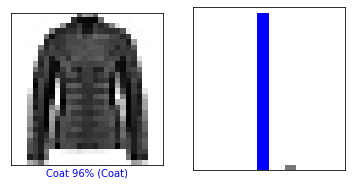

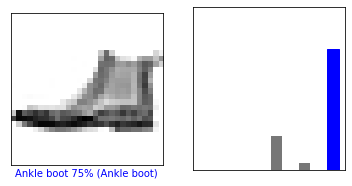

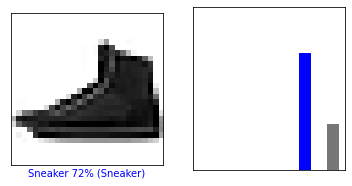

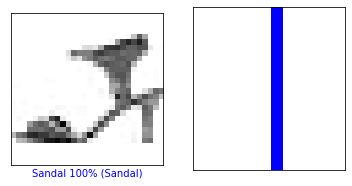

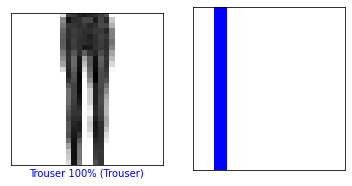

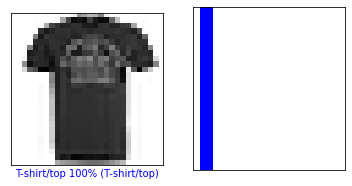

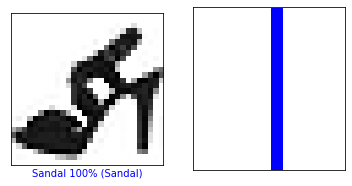

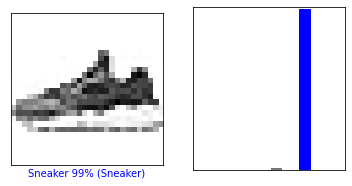

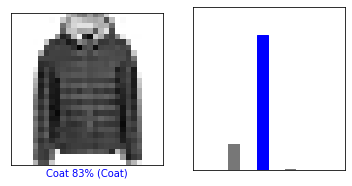

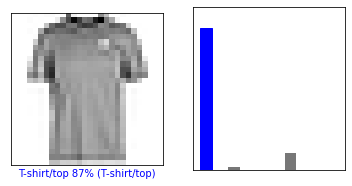

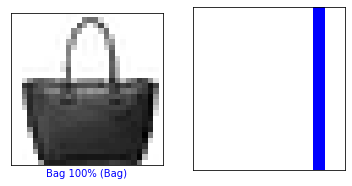

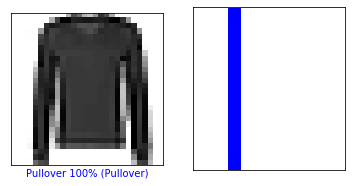

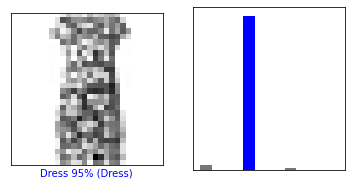

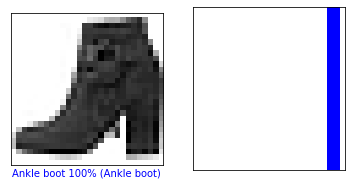

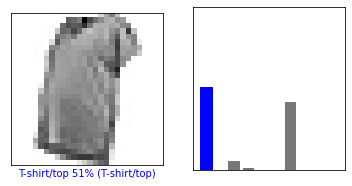

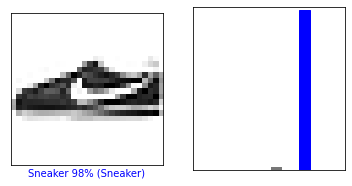

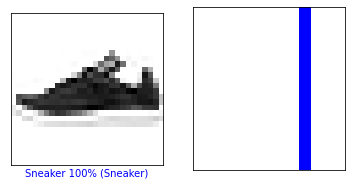

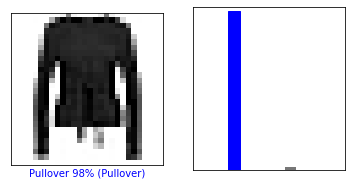

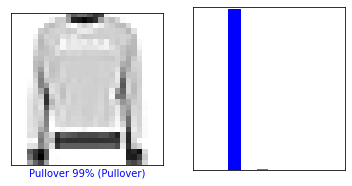

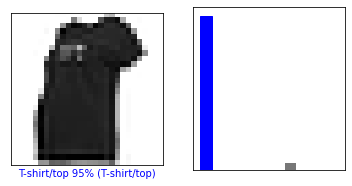

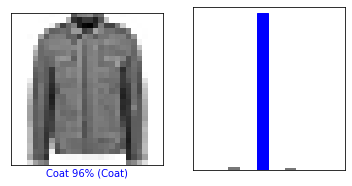

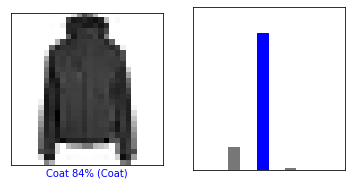

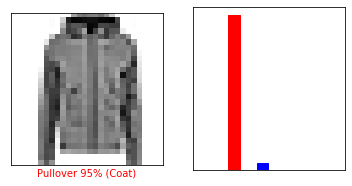

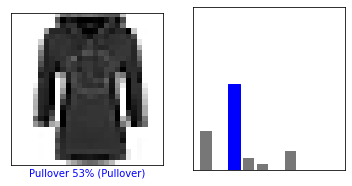

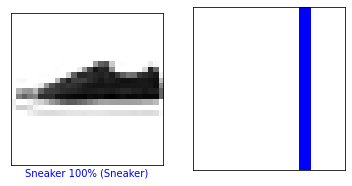

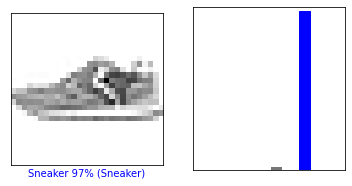

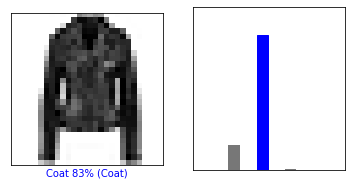

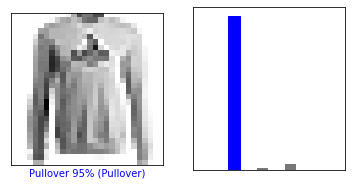

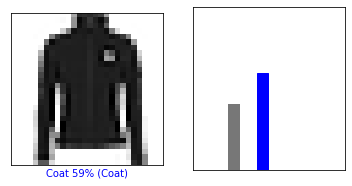

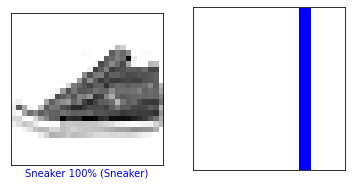

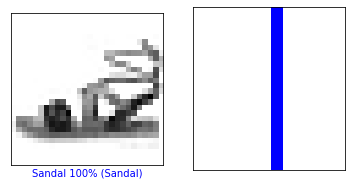

In [46]:
for i in range(n):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(1,2,2)
  plot_value_array(i, predictions, test_labels)